In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, DecisionTreeRegressor
from sklearn.metrics import *
from imblearn.metrics import specificity_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import fetch_california_housing

In [2]:
!pip install imblearn

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


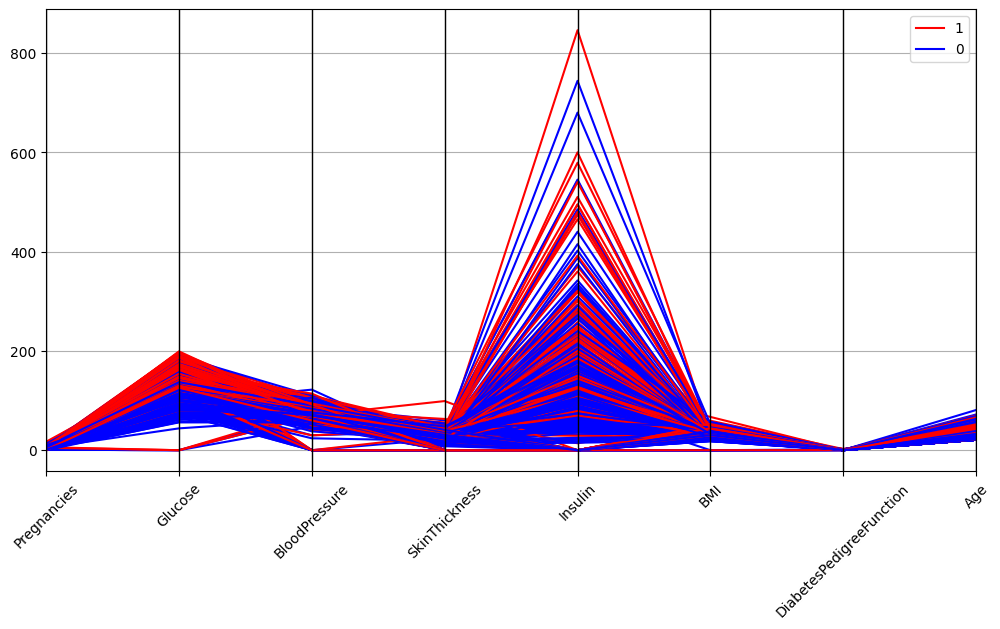

In [7]:
# Visualizamos la relación entre las características de nuestro dataset
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()

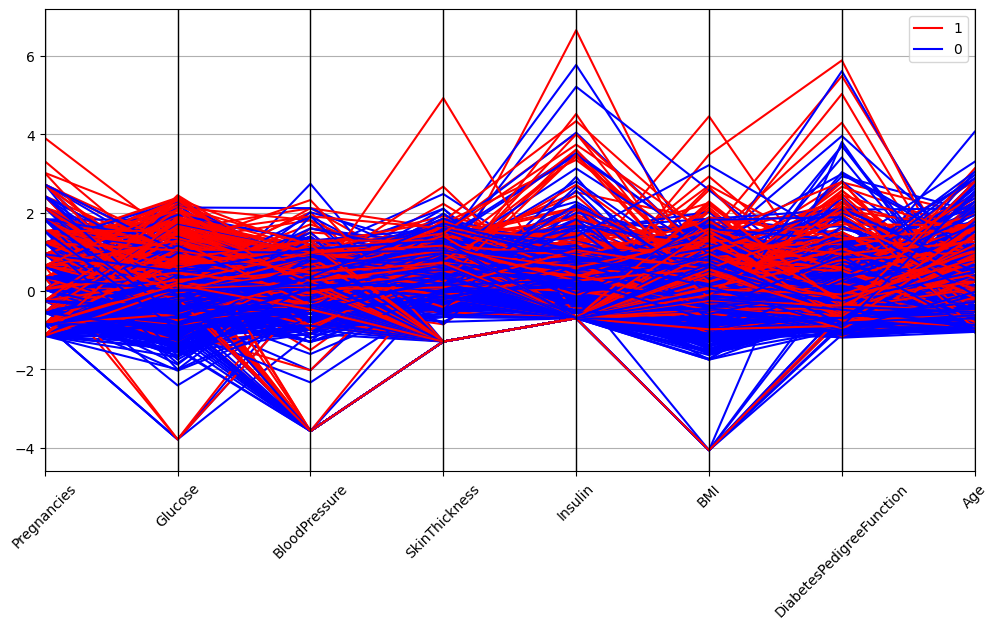

In [8]:
# Visualizamos la relación entre las características de nuestro dataset escalado
data_sc = pd.DataFrame(data=StandardScaler().fit_transform(df.drop(['Outcome'], axis=1)), columns=df.columns[:-1])
data_sc['Outcome'] = df.Outcome
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(data_sc, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()

In [9]:
# Procedemos a generar los conjuntos de entrenamiento y de testeo
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Outcome'],axis=1), df['Outcome'], test_size=0.2, random_state=42)

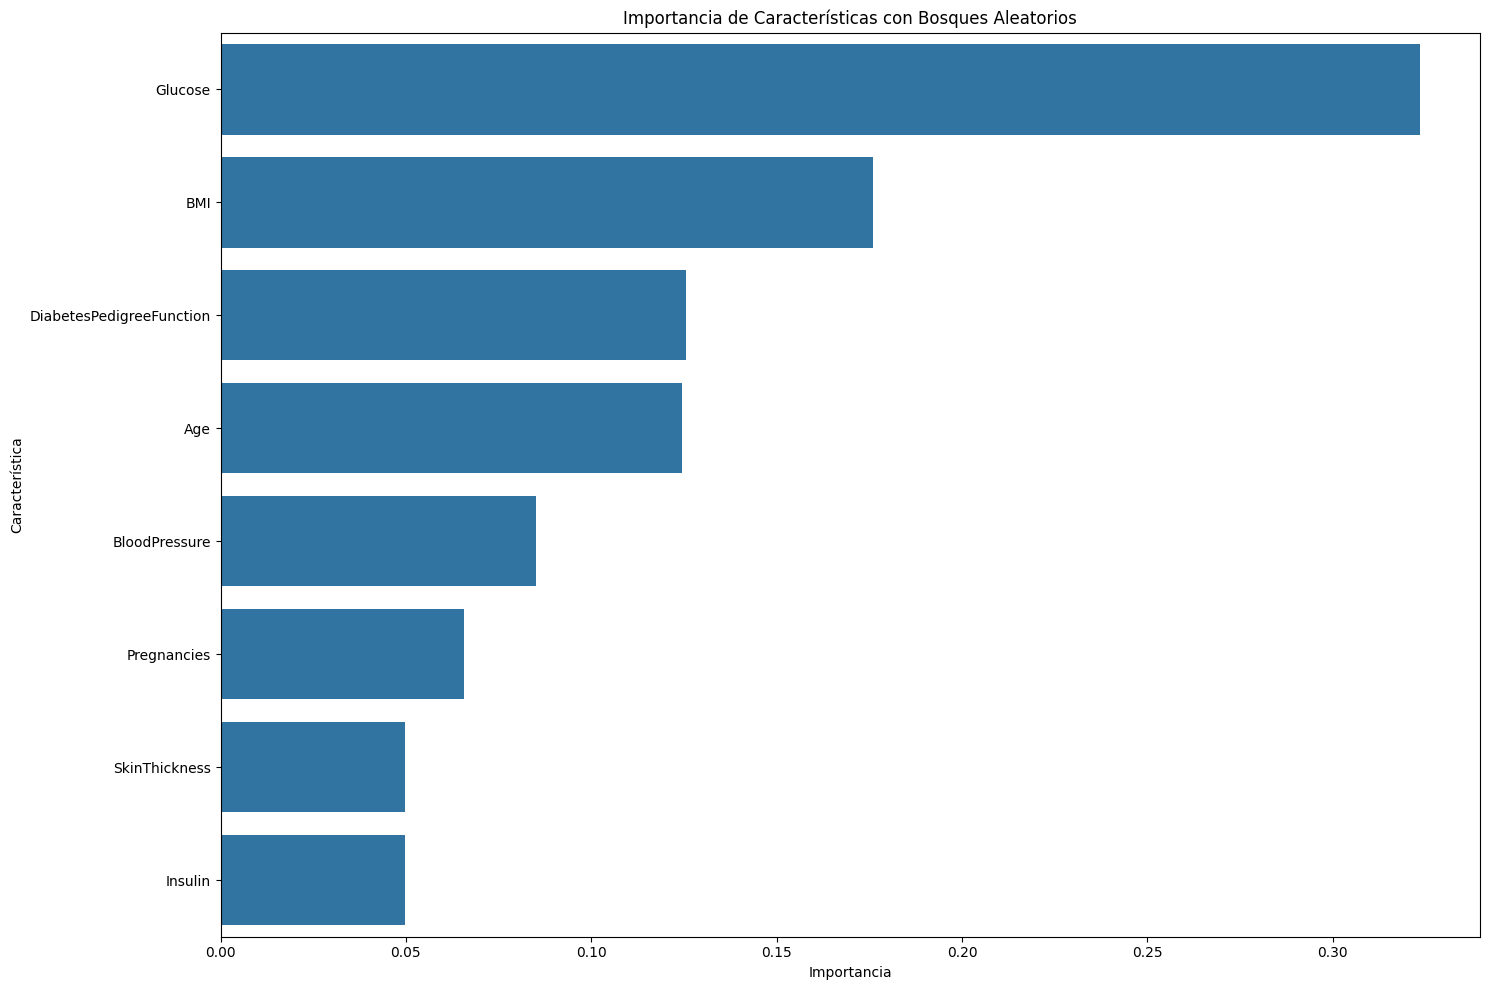

In [10]:
# Suponiendo que la columna 'y_n' es tu variable objetivo
X = df.drop('Outcome', axis=1)
y = df['Outcome']
# Crear el modelo de Bosques Aleatorios
clf = RandomForestRegressor(n_estimators=100)
clf.fit(X, y)
# Obtener importancia de características
importancias = clf.feature_importances_
# Crear un DataFrame para visualizar las importancias
df_importancia = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': importancias
})
# Ordenar el DataFrame por importancia
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)
# Visualizar la importancia de características con un gráfico de barras
plt.figure(figsize=(15, 10))
sns.barplot(x='Importancia', y='Característica', data=df_importancia)
plt.title('Importancia de Características con Bosques Aleatorios')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

In [11]:
# Crear un árbol de decisión complejo
complex_tree = DecisionTreeClassifier(max_depth=100, min_samples_leaf=1, random_state=42)
complex_tree.fit(X_train, y_train)

# Crear un árbol de decisión simple
simple_tree = DecisionTreeClassifier(max_depth=3, max_features=X_train.shape[1]//2, min_samples_leaf=20, random_state=42)
simple_tree.fit(X_train, y_train)

# Evaluar el modelo complejo en entrenamiento y prueba
train_pred_complex = complex_tree.predict(X_train)
test_pred_complex = complex_tree.predict(X_test)

# Evaluar el modelo simple en entrenamiento y prueba
train_pred_simple = simple_tree.predict(X_train)
test_pred_simple = simple_tree.predict(X_test)

GENERAMOS LAS METRICAS MANUALMENTE

In [12]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [13]:
# Métricas del modelo complejo
get_metrics(y_train, y_test, train_pred_complex, test_pred_complex)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,1.000000,1.000000,1.000000,1.000,1.000000,1.000000
Test,0.746753,0.672269,0.742424,0.625,0.727273,0.757576
Diferencia,0.253247,0.327731,0.257576,0.375,0.272727,0.242424


In [14]:
# Métricas del modelo simple
get_metrics(y_train, y_test, train_pred_simple, test_pred_simple)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.737785,0.663883,0.739823,0.597744,0.746479,0.733167
Test,0.636364,0.594203,0.660606,0.493976,0.745455,0.575758
Diferencia,0.101421,0.069680,0.079217,0.103768,0.001024,0.157410


# {'Accuracy': 0.7792207792207793, 'Precision': 0.7058823529411765, 'Recall': 0.6545454545454545, 'F1 Score': 0.679245283018868}  RESULTADO FINAL YA OPTIMIZADO

MATRIZ DE CONFUSION 


In [46]:
# Matriz de confusión
# Verdaderos positivos (True Positives, TP) en la esquina superior izquierda (57 en tu caso).
# Falsos positivos (False Positives, FP) en la esquina superior derecha (42 en tu caso).
# Falsos negativos (False Negatives, FN) en la esquina inferior izquierda (14 en tu caso).
# Verdaderos negativos (True Negatives, TN) en la esquina inferior derecha (41 en tu caso).
confusion_matrix(y_test, test_pred_simple)

array([[57, 42],
       [14, 41]], dtype=int64)

In [16]:
# Interpretación del árbol simple en texto plano
text_representation = export_text(simple_tree, feature_names=list(X_train.columns))
print(text_representation)

|--- Age <= 28.50
|   |--- Glucose <= 127.50
|   |   |--- BMI <= 30.95
|   |   |   |--- class: 0
|   |   |--- BMI >  30.95
|   |   |   |--- class: 0
|   |--- Glucose >  127.50
|   |   |--- SkinThickness <= 31.50
|   |   |   |--- class: 0
|   |   |--- SkinThickness >  31.50
|   |   |   |--- class: 1
|--- Age >  28.50
|   |--- BMI <= 27.85
|   |   |--- Glucose <= 123.00
|   |   |   |--- class: 0
|   |   |--- Glucose >  123.00
|   |   |   |--- class: 0
|   |--- BMI >  27.85
|   |   |--- Insulin <= 142.00
|   |   |   |--- class: 1
|   |   |--- Insulin >  142.00
|   |   |   |--- class: 1



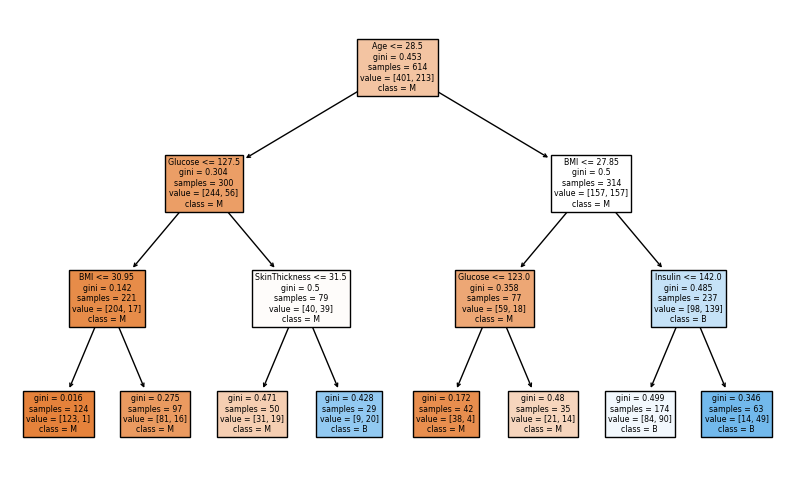

In [17]:
# Visualiza el árbol de decisión gráficamente
plt.figure(figsize=(10, 6))
plot_tree(simple_tree, feature_names=X_train.columns, class_names=['M','B'], filled=True)
plt.show()

OPTIMIZACION

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np

# Asumiendo que ya tienes tus datos divididos en conjuntos de entrenamiento y prueba
# X_train, X_test, y_train, y_test

# Entrenar árboles de decisión con diferentes funciones de pureza
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_entropy = DecisionTreeClassifier(criterion='entropy')

# Realiza validación cruzada para evaluar cada clasificador
scores_gini = cross_val_score(clf_gini, X_train, y_train, cv=5)
scores_entropy = cross_val_score(clf_entropy, X_train, y_train, cv=5)

# Calcula la puntuación media de la validación cruzada para cada criterio
mean_score_gini = np.mean(scores_gini)
mean_score_entropy = np.mean(scores_entropy)

# Selecciona el criterio con la mejor puntuación media
best_criterion = 'gini' if mean_score_gini > mean_score_entropy else 'entropy'
# Define el rango de hiperparámetros para realizar la búsqueda en cuadrícula
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Inicializa GridSearchCV con el clasificador que tiene el mejor criterio y el rango de hiperparámetros
grid_search = GridSearchCV(DecisionTreeClassifier(criterion=best_criterion), param_grid, cv=5, scoring='accuracy')

# Ejecuta la búsqueda en cuadrícula con los datos de
grid_search.fit(X_train, y_train)

# Encuentra los mejores hiperparámetros y muestra los resultados
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Entrena el clasificador con los mejores hiperparámetros encontrados
best_clf = DecisionTreeClassifier(**best_params, criterion=best_criterion)
best_clf.fit(X_train, y_train)

# Evalúa el clasificador en el conjunto de prueba
accuracy = best_clf.score(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {accuracy:.2f}")

Mejores hiperparámetros: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
Precisión en el conjunto de prueba: 0.78


APLICAMOS PARAMETROS? 

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_metrics(model, X_test, y_test):
    # Realiza predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcula métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # También puedes agregar otras métricas que desees, como especificidad, por ejemplo.
    
    metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }
    
    return metrics

# Llama a get_metrics con el mejor clasificador y datos de prueba
metrics = get_metrics(best_clf, X_test, y_test)

# Imprime o muestra las métricas
print(metrics)


{'Accuracy': 0.7792207792207793, 'Precision': 0.7058823529411765, 'Recall': 0.6545454545454545, 'F1 Score': 0.679245283018868}


In [53]:

confusion_matrix(y_test, y_pred)

array([[84, 15],
       [19, 36]], dtype=int64)